In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#数据格式化

datafile = open('log.lammps', 'r', encoding='utf-8')
datas = datafile.readlines()
#print(type(datas))
datalist = []
for i in range(len(datas)-1):
    datas[i] = ' '.join(datas[i].split())
    datalist.append(datas[i])

#print(datalist)
    
datafile.close()



datafile = open('log.txt', 'w')

data = '\n'.join(datalist)

datafile.write(data)

datafile.close()


In [9]:
contents = pd.read_csv('log.txt', sep=' ')

star = int(input("起始行数："))

end = int(input("结束行数："))

contents = contents.iloc[star: end+1, :]

#contents = contents.drop(0)

contents.head()

起始行数：100
结束行数：200


,Step,Temp,PotEng,c_msd_all[4],c_msd_cr[4],c_msd_fe[4],c_msd_o[4],c_msd_cr2o3[4],v_twopoint_all,v_twopoint_cr,v_twopoint_fe,v_twopoint_o,v_twopoint_cr2o3,v_fitslope_all,v_fitslope_cr,v_fitslope_fe,v_fitslope_o,v_fitslope_cr2o3
100,100000,300.82732,-2104548.2,0.116044,0.124669,0.091827,0.140640,0.134251,0.000193,0.000208,0.000153,0.000234,0.000224,0.000166,0.000183,0.000130,0.000205,0.000196
101,101000,299.27880,-2104558.1,0.117143,0.126846,0.093594,0.143135,0.136620,0.000193,0.000209,0.000154,0.000236,0.000225,0.000166,0.000183,0.000131,0.000205,0.000196
102,102000,301.06804,-2104562.4,0.117209,0.128256,0.094465,0.144040,0.137727,0.000192,0.000210,0.000154,0.000235,0.000225,0.000166,0.000183,0.000131,0.000204,0.000196
103,103000,299.35247,-2104554.9,0.118859,0.129620,0.094989,0.145841,0.139353,0.000192,0.000210,0.000154,0.000236,0.000225,0.000166,0.000183,0.000131,0.000204,0.000196
104,104000,299.74433,-2104587.9,0.118477,0.127204,0.095203,0.143479,0.136969,0.000190,0.000204,0.000153,0.000230,0.000220,0.000166,0.000183,0.000131,0.000203,0.000195


In [10]:
Step = contents['Step']/1000

Temp = contents['Temp']

PE = contents['PotEng']

msd_Cr2O3_Fe = contents['c_msd_all[4]']

msd_Cr = contents['c_msd_cr[4]']

msd_Fe = contents['c_msd_fe[4]']

msd_O = contents['c_msd_o[4]']

msd_Cr2O3 = contents['c_msd_cr2o3[4]']

v_twopoint_Cr2O3_Fe = contents['v_twopoint_all']

v_twopoint_Cr = contents['v_twopoint_cr']

v_twopoint_Fe = contents['v_twopoint_fe']

v_twopoint_O = contents['v_twopoint_o']

v_twopoint_Cr2O3 = contents['v_twopoint_cr2o3']

v_fitslope_Cr2O3_Fe = contents['v_fitslope_all']

v_fitslope_Cr = contents['v_fitslope_cr']

v_fitslope_Fe = contents['v_fitslope_fe']

v_fitslope_O = contents['v_fitslope_o']

v_fitslope_Cr2O3 = contents['v_fitslope_cr2o3']

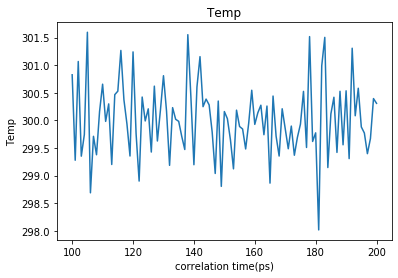

In [11]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Temp")
plt.plot(Step, Temp)
plt.title('Temp')

plt.show()

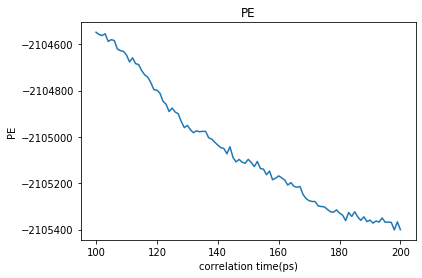

In [12]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("PE")
plt.plot(Step, PE)
plt.title('PE')

plt.show()

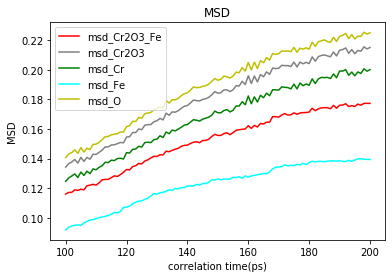

In [13]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("MSD")
plt.plot(Step, msd_Cr2O3_Fe, color='r', label='msd_Cr2O3_Fe')
plt.plot(Step, msd_Cr2O3, color='grey', label='msd_Cr2O3')
plt.plot(Step, msd_Cr, color='g', label='msd_Cr')
plt.plot(Step, msd_Fe, color='cyan', label='msd_Fe')
plt.plot(Step, msd_O, color='y', label='msd_O')
plt.legend(loc="upper left")
plt.title('MSD')

plt.show()

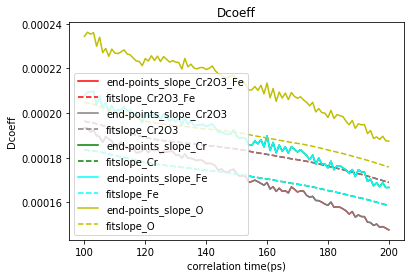

In [14]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Dcoeff")
plt.plot(Step, v_twopoint_Cr2O3_Fe, color="r", linestyle='-', label='end-points_slope_Cr2O3_Fe')
plt.plot(Step, v_fitslope_Cr2O3, color="r", linestyle='--', label='fitslope_Cr2O3_Fe')
plt.plot(Step, v_twopoint_Cr2O3_Fe, color="grey", linestyle='-', label='end-points_slope_Cr2O3')
plt.plot(Step, v_fitslope_Cr2O3, color="grey", linestyle='--', label='fitslope_Cr2O3')
plt.plot(Step, v_twopoint_Cr, color="g", linestyle='-', label='end-points_slope_Cr')
plt.plot(Step, v_fitslope_Cr, color="g", linestyle='--', label='fitslope_Cr')
plt.plot(Step, v_twopoint_Cr, color="cyan", linestyle='-', label='end-points_slope_Fe')
plt.plot(Step, v_fitslope_Cr, color="cyan", linestyle='--', label='fitslope_Fe')
plt.plot(Step, v_twopoint_O, color="y", linestyle='-', label='end-points_slope_O')
plt.plot(Step, v_fitslope_O, color="y", linestyle='--', label='fitslope_O')
plt.legend(loc="lower left")
plt.title('Dcoeff')

plt.show()